In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [14]:
df = pd.read_csv('mall _customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
#df = df.drop(['CustomerID','Gender'], axis=1)
df.drop(['CustomerID','Gender'], axis=1, inplace=True)

In [16]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [17]:
df.rename(columns={'Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [18]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [19]:
df.shape

(200, 3)

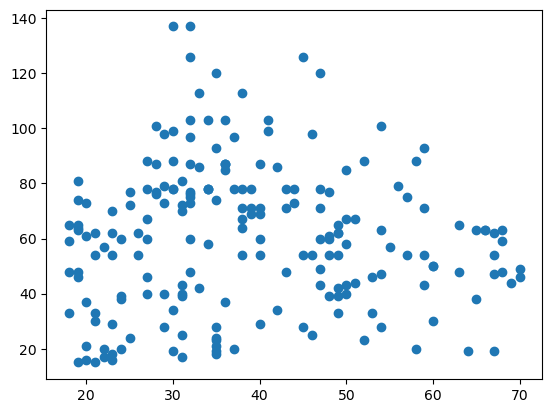

In [20]:
plt.scatter(df.age, df.income)

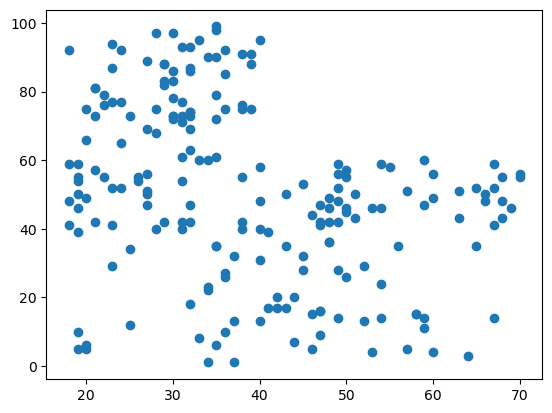

In [21]:
plt.scatter(df.age, df.score)

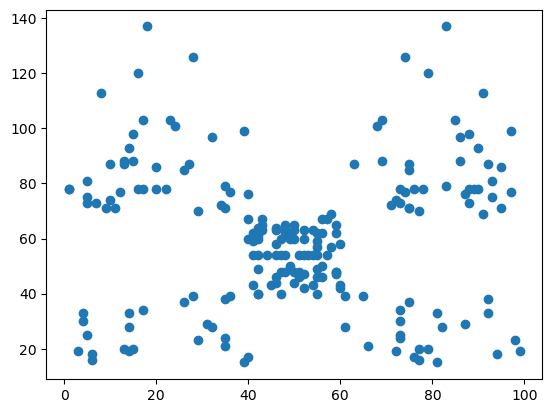

In [22]:
plt.scatter(df.score, df.income)

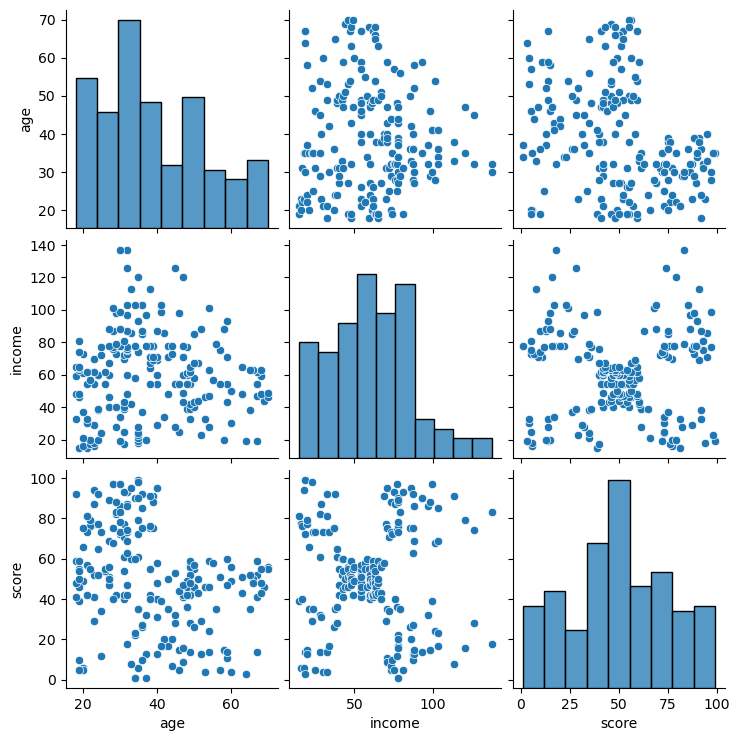

In [23]:
import seaborn as sns
sns.pairplot(df[['age','income','score']])
plt.savefig('image.png')

# KMEANS CLUSTER

Text(0.5, 1.0, 'income and score plot of cutomres')

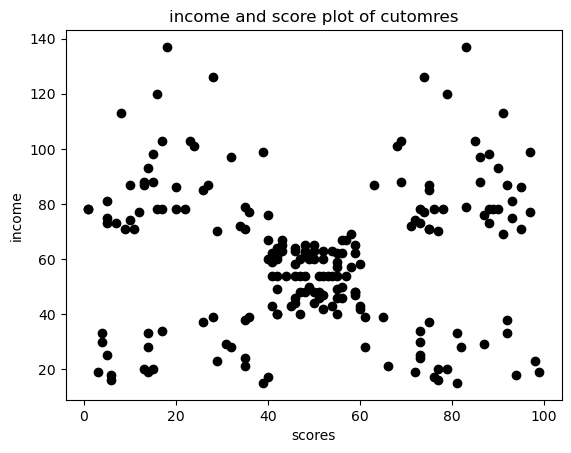

In [25]:
plt.scatter(df.score, df.income, color='black')
plt.xlabel('scores')
plt.ylabel('income')
plt.title('income and score plot of cutomres')

In [26]:
from sklearn.cluster import KMeans

In [27]:
km = KMeans() #n_clusters=8

In [28]:
km.fit(df[['score', 'income']]) #fit_predict()

KMeans()

In [29]:
df['Group1'] = km.predict(df[['score', 'income']])

In [30]:
km.cluster_centers_ 

array([[ 82.72727273, 108.18181818],
       [ 80.04761905,  25.0952381 ],
       [ 50.82978723,  47.72340426],
       [ 12.68181818,  80.18181818],
       [ 19.52380952,  25.14285714],
       [ 81.89285714,  78.03571429],
       [ 22.        , 109.7       ],
       [ 46.45      ,  64.45      ]])

In [31]:
df

,age,income,score,Group1
0,19,15,39,4
1,21,15,81,1
2,20,16,6,4
3,23,16,77,1
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,6
197,32,126,74,0
198,32,137,18,6


In [32]:
df0 = df[df.Group1 == 0]
df1 = df[df.Group1 == 1]
df2 = df[df.Group1 == 2]
df3 = df[df.Group1 == 3]
df4 = df[df.Group1 == 4]
df5 = df[df.Group1 == 5]
df6 = df[df.Group1 == 6]
df7 = df[df.Group1 == 7]

In [33]:
df0.head()

,age,income,score,Group1
179,35,93,90,0
181,32,97,86,0
183,29,98,88,0
185,30,99,97,0
187,28,101,68,0


In [34]:
df2.head()

,age,income,score,Group1
40,65,38,35,2
42,48,39,36,2
43,31,39,61,2
45,24,39,65,2
46,50,40,55,2


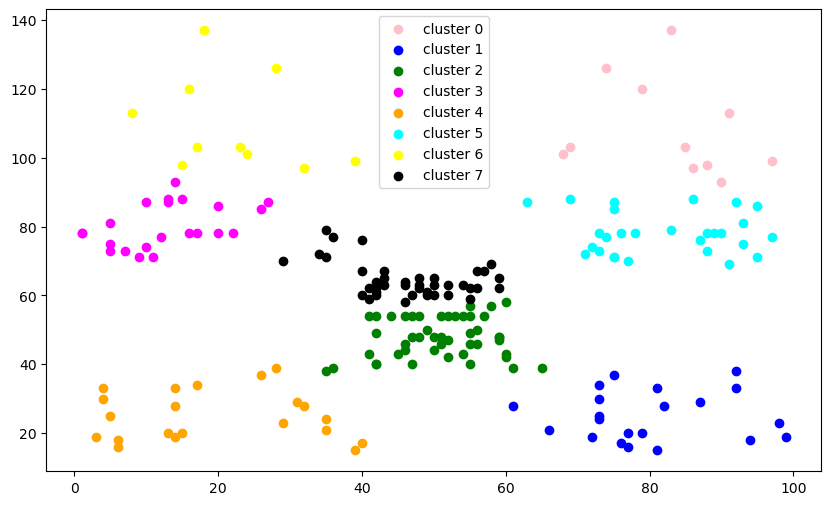

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

plt.legend()

In [36]:
centroid = km.cluster_centers_ 
centroid

array([[ 82.72727273, 108.18181818],
       [ 80.04761905,  25.0952381 ],
       [ 50.82978723,  47.72340426],
       [ 12.68181818,  80.18181818],
       [ 19.52380952,  25.14285714],
       [ 81.89285714,  78.03571429],
       [ 22.        , 109.7       ],
       [ 46.45      ,  64.45      ]])

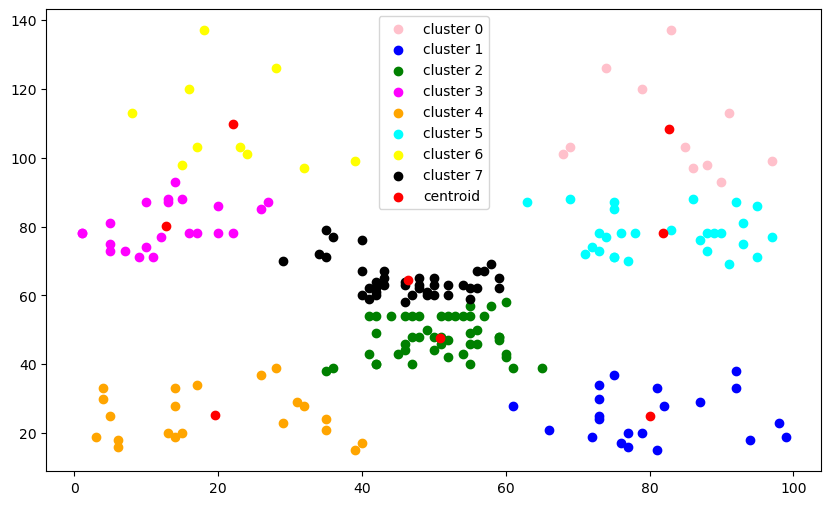

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')
plt.scatter(df5.score, df5.income, color='cyan', label='cluster 5')
plt.scatter(df6.score, df6.income, color='yellow', label='cluster 6')
plt.scatter(df7.score, df7.income, color='black', label='cluster 7')

plt.scatter(centroid[:, 0], centroid[:,1], color='red', label='centroid')

plt.legend()

# Optimizing KMENAS

In [38]:
wcss = []
cluster = range(1,15)
for k in cluster:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [39]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25028.020475269415,
 22122.192456961642,
 19707.258979794766,
 18400.743148053494,
 15845.619372815676,
 14293.143054331289,
 13242.001387742692]

Text(0.5, 0, 'Cluster')

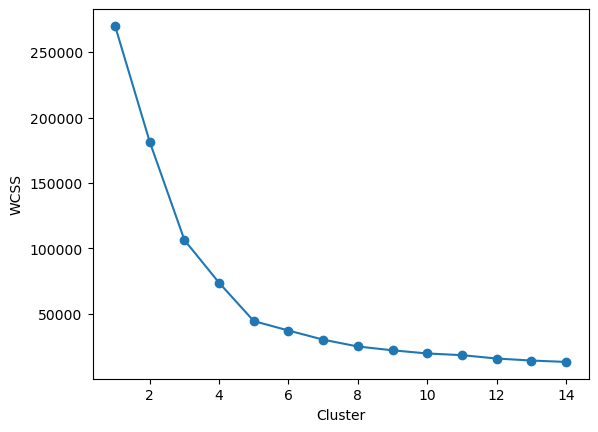

In [40]:
plt.plot(range(1,15), wcss, marker='o') #line plot
plt.ylabel('WCSS')
plt.xlabel('Cluster')

# After Optimizing

In [44]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']]) #fit_predict()

In [45]:
df.head()

,age,income,score,Group1,Group2
0,19,15,39,4,4
1,21,15,81,1,2
2,20,16,6,4,4
3,23,16,77,1,2
4,31,17,40,4,4


In [46]:
cen = km.cluster_centers_
cen

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

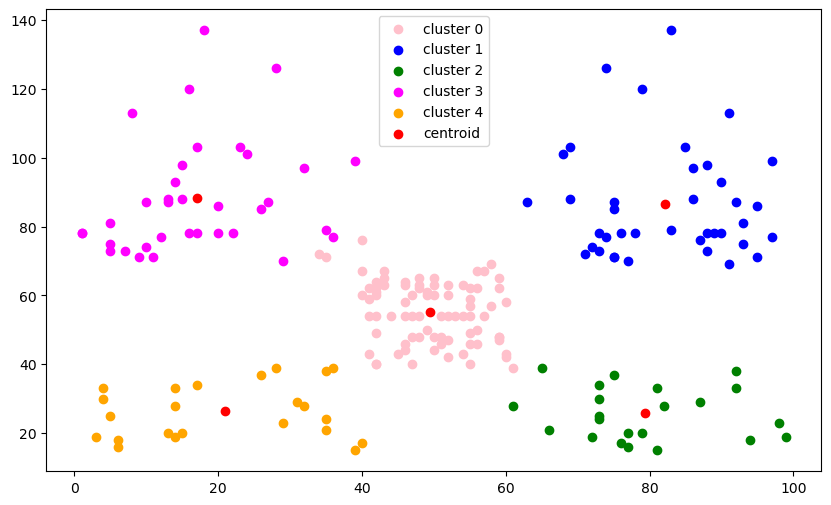

In [47]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='pink', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid')

plt.legend()